In [5]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

file_img = "/cluster/visuo/users/danielh/code/surrogate_data/tests/data/lenna.png"
image = mpimg.imread(file_img)
data = np.mean(image, axis=2)[:100, :100]
data = data.astype(np.float64)

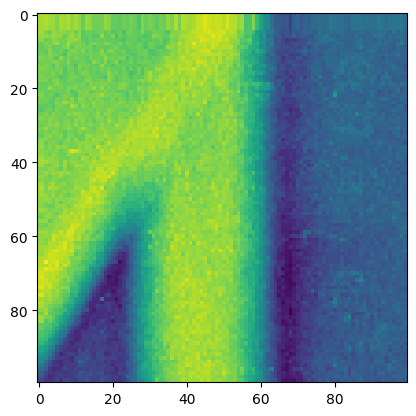

In [6]:
plt.imshow(data)

In [7]:
# Example usage
array = np.random.rand(10, 10)  # Example 2D array
h = 2.0  # Example lag distance
b = 1.0  # Example bandwidth

gamma_h = compute_variogram_from_array(array, h, b)
print(f"γ(h) = {gamma_h}")

# Plot the variogram
plt.plot(hh, np.array(res))
plt.plot(h_values, variogram_result)
plt.xlabel("Distance")
plt.ylabel("Variogram")
plt.title("Variogram Plot")
plt.grid(True)
plt.show()

NameError: name 'compute_variogram_from_array' is not defined

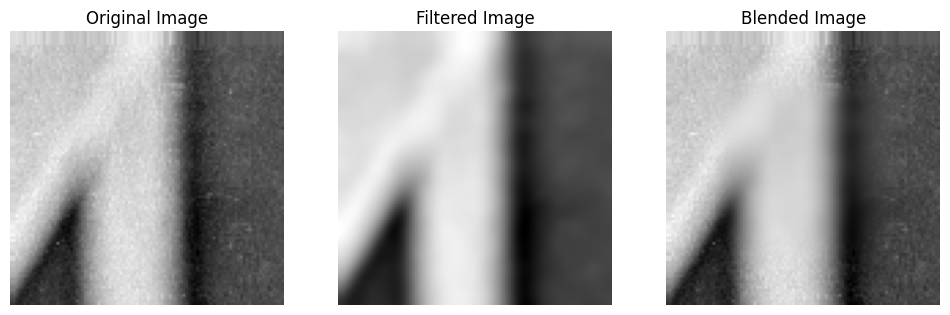

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load grayscale image (can be any image)
img = data

# Define a mask to keep some pixels unchanged (e.g., 20% of pixels)
mask = np.zeros_like(img, dtype=bool)
num_keep = int(0.2 * img.size)  # Keep 20% of pixels
keep_indices = np.random.choice(img.size, num_keep, replace=False)
mask.ravel()[keep_indices] = True  # Set selected pixels to True (untouched)

mask = np.zeros_like(img, dtype=bool)
mask[20:80, 20:80] = True

# Apply a Gaussian filter (or any other filter) on the entire image
sigma = 2  # Standard deviation for Gaussian filter
filtered_img = gaussian_filter(img, sigma=sigma)

# Now blend the filtered image with the original based on the mask
# Smooth the boundary of the unchanged pixels by blending
edge_blend = gaussian_filter(np.float32(mask), sigma=5)  # Create a smooth transition
edge_blend = np.clip(edge_blend, 0, 1)  # Ensure it's in the range [0, 1]

# Combine the original image with the filtered image based on the mask and smooth edges
final_img = img * (1 - edge_blend) + filtered_img * edge_blend

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(filtered_img, cmap="gray")
plt.title("Filtered Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(final_img, cmap="gray")
plt.title("Blended Image")
plt.axis("off")

plt.show()


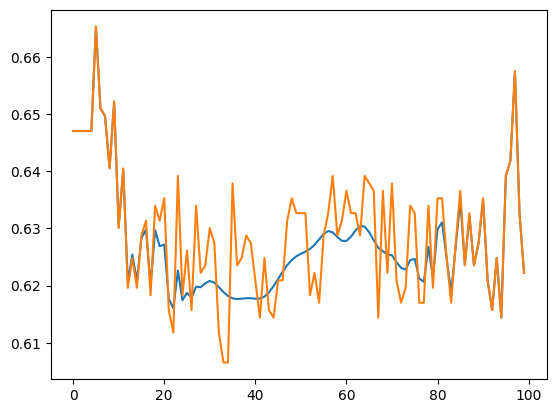

In [ ]:
plt.plot(final_img[:, 50])
plt.plot(img[:, 50])